0.1482720000000004
0.18186399999999914


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 10: invalid start byte

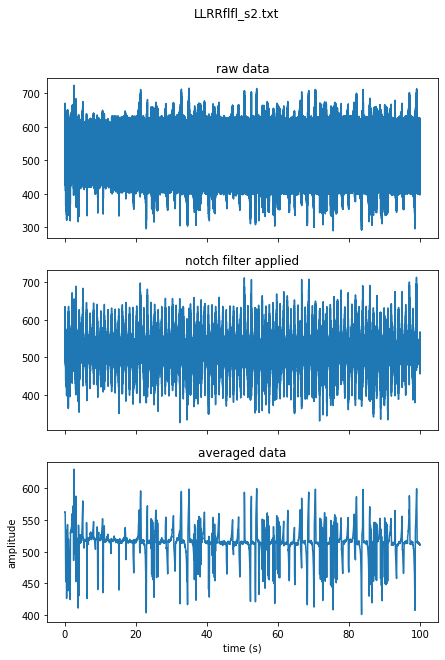

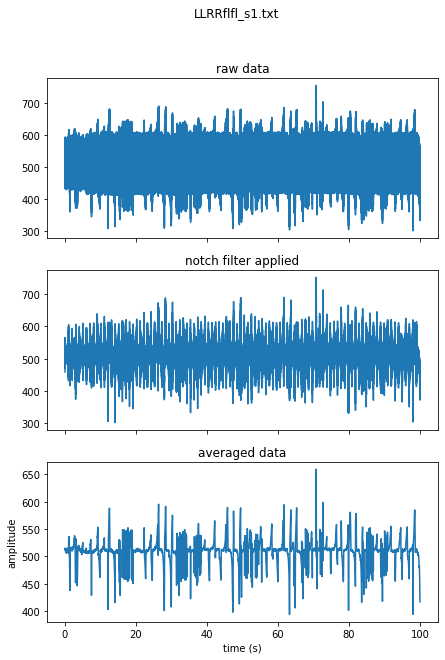

In [10]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import os
import time

# Changing directory
os.getcwd()
os.chdir('Spikerbox/Week_12')
filenames = os.listdir()

for file in filenames:
    file = open(file, 'r') # opeing and reading each file
    f = file.readlines()
    amp_ls = []

    for line in f:
        line = line.strip('\n').split(' ')
        amp = line[0]
        amp_ls.append(float(amp))
    time_ls = np.linspace(0,100,len(amp_ls))
    amp_ls.reverse() # Data collected from Spiker Box was saved in reverse.
    
    # designing the notch filter
    fs = len(amp_ls)/100  # Sample frequency (Hz)
    f0 = 50  # Frequency to be removed from signal (Hz)
    Q = 20  # Quality factor - determines the bandwidth (Q = f0/bandwidth)
    b, a = signal.iirnotch(f0, Q, fs)
    freq, h = signal.freqz(b, a, fs=fs)

    start = time.process_time()
    y_notched = signal.filtfilt(b, a, amp_ls) # Applying the notch filter to the data
    print(time.process_time() - start)
    
    # Taking rolling average for x points
    x = 200;
    y_av = [] # Setting up an array to store the avergaed data
    time_ = [] # Setting up an array to store the new times the same length as our averaged data
    i = 0
    while i <len(amp_ls):
        y_av.append(np.mean(amp_ls[i:i+x]))
        time_.append(time_ls[i])
        i += x
    
    # Plotting the data
    fig, axs = plt.subplots(3, sharex=True)
    fig.set_size_inches(7, 10)
    axs[0].plot(time_ls,amp_ls)
    axs[0].set_title('raw data')
    axs[1].plot(time_ls,y_notched)
    axs[1].set_title('notch filter applied')
    axs[2].plot(time_,y_av)
    axs[2].set_title('averaged data')
    fig.suptitle(str(file.name))
    plt.xlabel('time (s)')
    plt.ylabel('amplitude')
    
    # Saving the figures
    #fig.savefig(str(file.name).replace('.txt','') + '.pdf', dpi=100)

In [5]:
os.getcwd()
os.chdir('Spikerbox/Week_12')
filenames = os.listdir()

In [9]:
os.getcwd()

'/Users/archiefox/Desktop/ConnectFour'

In [8]:
os.chdir('..')